#Домашнее задание № 13

#Алгоритмы кластеризации



In [1]:
# установим библиотеку
!pip install opencv-python

In [2]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
!wget 'https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/Изображение_к_дз_по_Кластеризации_feml.jpg'

--2024-11-10 07:03:30--  https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B4%D0%B7_%D0%BF%D0%BE_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_feml.jpg
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107959 (105K) [image/jpeg]
Saving to: ‘Изображение_к_дз_по_Кластеризации_feml.jpg’

Изображение_к_дз_по 100%[===================>] 105.43K   240KB/s    in 0.4s    

2024-11-10 07:03:32 (240 KB/s) - ‘Изображение_к_дз_по_Кластеризации_feml.jpg’ saved [107959/107959]



In [6]:
# не хочет монтироваться)
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# попробуем по другому
!wget 'https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/Изображение_к_дз_по_Кластеризации_feml.jpg'

--2024-11-10 07:13:11--  https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B4%D0%B7_%D0%BF%D0%BE_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_feml.jpg
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107959 (105K) [image/jpeg]
Saving to: ‘Изображение_к_дз_по_Кластеризации_feml.jpg’

Изображение_к_дз_по 100%[===================>] 105.43K   239KB/s    in 0.4s    

2024-11-10 07:13:12 (239 KB/s) - ‘Изображение_к_дз_по_Кластеризации_feml.jpg’ saved [107959/107959]



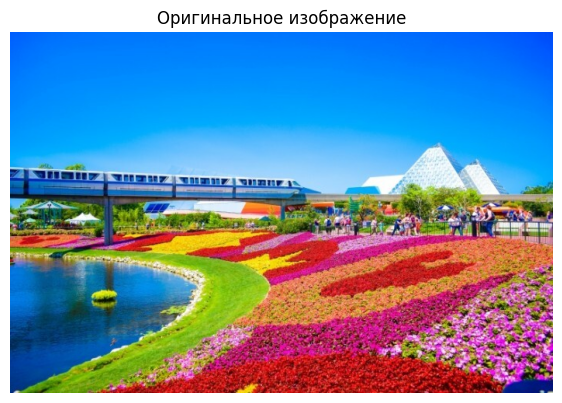

In [20]:
# посмотрим на нашу картинку
path = '/content/Изображение_к_дз_по_Кластеризации_feml.jpg'
img = cv2.imread(path)
draw_picture(img, 'Оригинальное изображение', bgr=True)

Забегая вперед скажу, что бесплатной памяти тут катастрофически не хватает. Поэтому уменьшаю размер изображения в 2 раза

In [25]:
# посмотрим размер картинки
img.shape

(466, 700, 3)

In [30]:
# зададим меньший размер
new_size = (img.shape[1]//2, img.shape[0]//2)
new_size

(350, 233)

In [33]:
# уменьшим размер
img = cv2.resize(img, dsize = new_size,
                  interpolation=cv2.INTER_CUBIC   # кубическая интерполяция
                 )

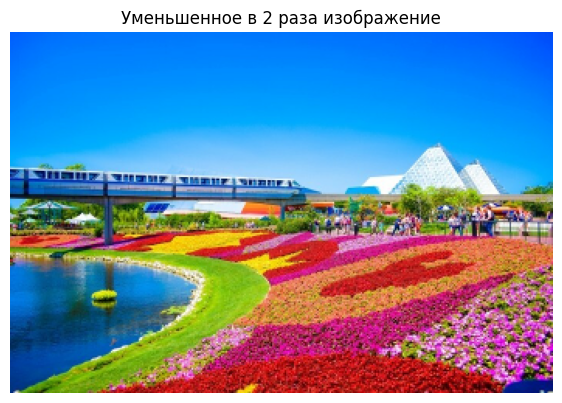

In [34]:
# посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 2 раза изображение', bgr=True)

In [35]:
# проверим размер
img.shape

(233, 350, 3)

In [12]:
from PIL import Image
import os
import numpy as np

image = Image.open('/content/feml.jpeg')
image.size
a, b = image.size
new_size = (a//2, b//2)
img_ = image.resize(new_size)
img = np.array(img_)

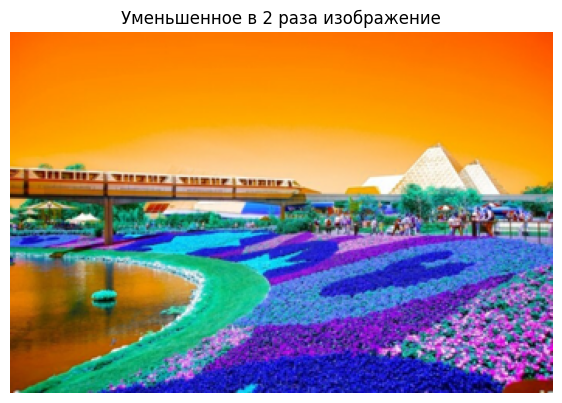

In [13]:
# посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 2 раза изображение', bgr=True)

#2. Реализуем 3 модели кластеризации

In [5]:
type(img)

numpy.ndarray

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [6]:
# загрузим библиотеки
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
# посмотрим размер нашего изображения
img.shape

(466, 700, 3)

In [8]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [9]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [10]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [11]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
set(target)

{0, 1}

In [13]:
len(target)

326200

In [14]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[234.97140473, 145.39519317,  33.19342089],
       [ 73.73762479, 102.25210538, 163.67307067]])

In [15]:
color_space[target]

array([[234.97140473, 145.39519317,  33.19342089],
       [234.97140473, 145.39519317,  33.19342089],
       [234.97140473, 145.39519317,  33.19342089],
       ...,
       [ 73.73762479, 102.25210538, 163.67307067],
       [ 73.73762479, 102.25210538, 163.67307067],
       [ 73.73762479, 102.25210538, 163.67307067]])

In [16]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [17]:
# проверим размер
output_image.shape

(466, 700, 3)

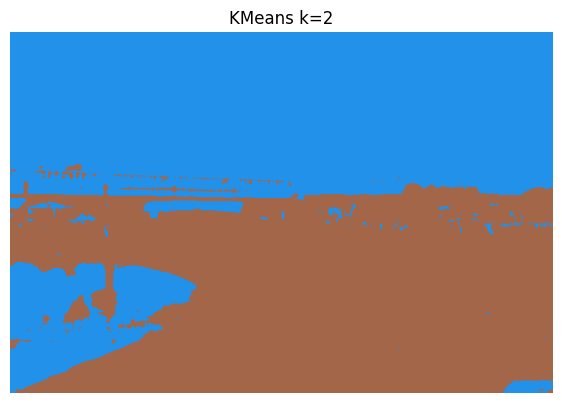

In [18]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [19]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=original_image, reshaped_img=reshaped_img, k=2):

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

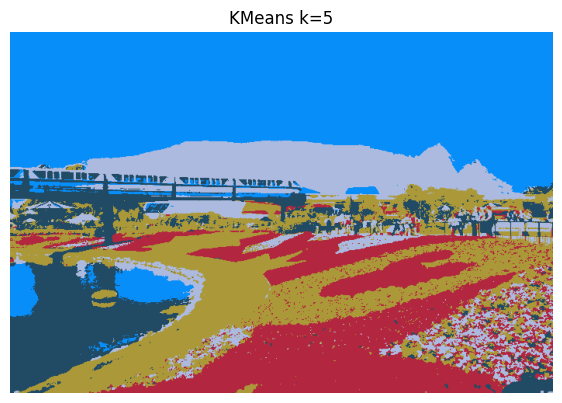

In [20]:
# посмотрим
KM_k(k=5)

k=10

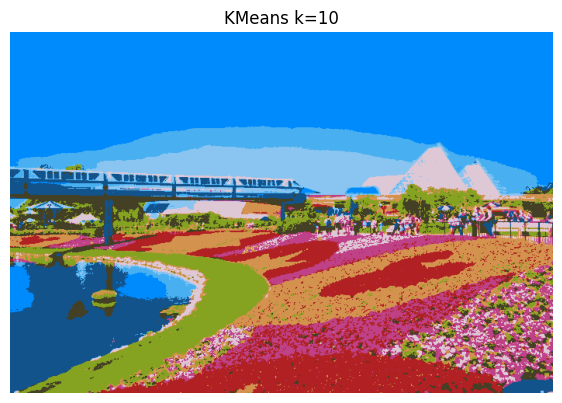

In [21]:
# посмотрим
KM_k(k=10)

k=20

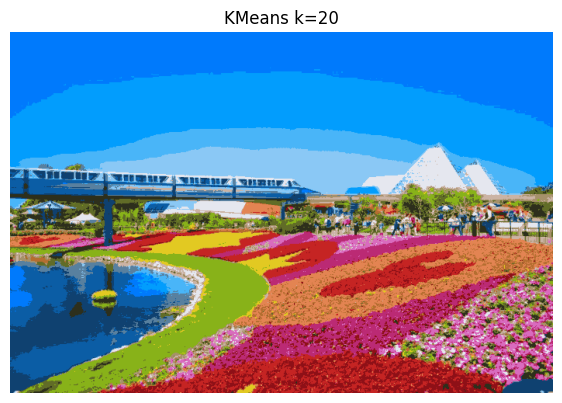

In [22]:
# посмотрим
KM_k(k=20)

b) DBSCAN

In [23]:
from PIL import Image
import os

In [24]:
#image = Image.open('/content/feml.jpeg')
#image.size

In [25]:
#a, b = image.size

In [26]:
#new_size = (a//1, b//1)
#new_size

In [27]:
#image_4 = image.resize(new_size)
#img_4 = np.array(image_4)

In [28]:
img_4 = img

In [29]:
reshaped_img_4 = np.reshape(img_4,
	                          ((img_4.shape[0] * img_4.shape[1]),
                            3)
                           )
reshaped_img_4

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

In [30]:
from sklearn.cluster import DBSCAN
import cv2

In [31]:
# Создим объект DBSCAN
# dbscan = DBSCAN(eps=3, min_samples=15, metric='minkowski', p=1, n_jobs=-1)
dbscan = DBSCAN(eps=3.7, min_samples=13)

In [32]:
# обучим модель
# dbscan.fit(reshaped_img_4)
# dbscan

In [33]:
# Получим предсказания
target = dbscan.fit_predict(reshaped_img_4)
target

array([ 0,  0,  0, ..., -1, -1, -1])

In [34]:
print('Итого найдено : {} кластеров'.format(len(set(target))), np.unique(target))

Итого найдено : 423 кластеров [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 

In [35]:
# начнем строить наш df
# с ним уже привычнее)
import pandas as pd

# это df нашего "плоского" фото
df = pd.DataFrame(reshaped_img_4)
df.head()

,0,1,2
0,255,92,0
1,255,92,0
2,253,93,0
3,253,93,0
4,253,93,0


In [36]:
# добавим найденные кластеры
df['clusters'] = target
df.head()

,0,1,2,clusters
0,255,92,0,0
1,255,92,0,0
2,253,93,0,0
3,253,93,0,0
4,253,93,0,0


In [37]:
# усредним значения внутри кластеров
df_ = df.groupby(['clusters']).mean().astype('uint8')
# а это уже нужная информация для извлечения цвета кластера
df_.head()

,0,1,2
clusters,,,
-1,106,113,148
0,253,155,32
1,216,159,72
2,203,178,145
3,202,156,95


In [38]:
# запомним наши цвета для раскраски
color_space = np.stack((df_[0].to_numpy(),
                        df_[1].to_numpy(),
                        df_[2].to_numpy()),
                        axis=-1
                      )
color_space[:5]

array([[106, 113, 148],
       [253, 155,  32],
       [216, 159,  72],
       [203, 178, 145],
       [202, 156,  95]], dtype=uint8)

In [39]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image_4 = np.reshape(color_space.astype('uint8')[target],
                            (img_4.shape[0], img_4.shape[1], 3)
                           )

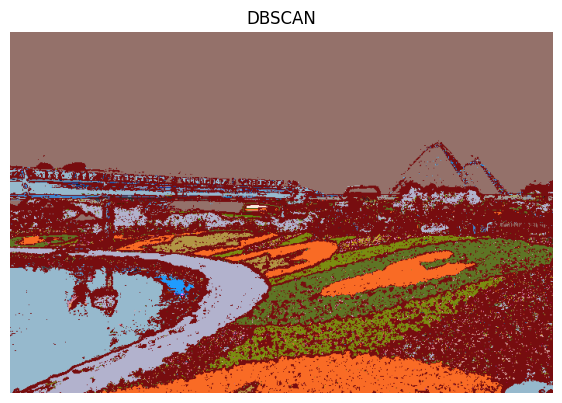

In [40]:
# посмотрим на нашу картинку
draw_picture(output_image_4, 'DBSCAN', bgr=True)

In [41]:
color_space_1 = []
for ele in np.unique(target):
    color_space_1.append(df[df['clusters'] == ele].iloc[0].tolist()[:3])

color_space_1 = np.asarray(color_space_1)
color_space_1[:5]

array([[242, 162,   7],
       [255,  92,   0],
       [221, 168,  87],
       [204, 179, 147],
       [201, 161,  96]])

In [42]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image_4 = np.reshape(color_space_1.astype('uint8')[target],
                            (img_4.shape[0], img_4.shape[1], 3)
                           )

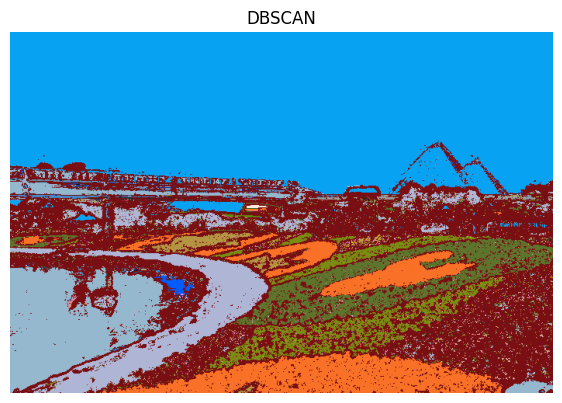

In [43]:
# посмотрим на нашу картинку
draw_picture(output_image_4, 'DBSCAN', bgr=True)

In [1]:
import torch
torch.cuda.empty_cache()

In [1]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np
import cv2

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

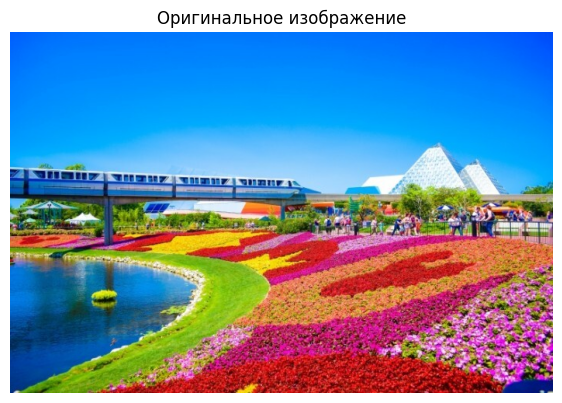

In [3]:
# посмотрим на нашу картинку
img = cv2.imread('/content/feml.jpeg')
draw_picture(img, 'Оригинальное изображение', bgr=True)

In [4]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.

In [5]:
from sklearn.cluster import AgglomerativeClustering

k=2

In [6]:
# построим модель
clustering = AgglomerativeClustering(n_clusters=2)

In [ ]:
# обучим модель
clustering.fit(reshaped_img)
clustering

In [ ]:
# получим кластеры
labels = clustering.labels_
labels